In [10]:
from modules.client import OffVarianceClient
import modules.utils as utils
from pandas import DataFrame
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [11]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 2.0) & (games_df['odds_open_tb25'] <= 2.5)
]

Count: 4743
Open profit: 9.589999999999993
Close profit: -69.09000000000003
Open ROI: 0.002021927050390047
Close ROI: -0.014566729917773568
UDI: 0.013575158261843653
AxesSubplot(0.125,0.125;0.775x0.755)


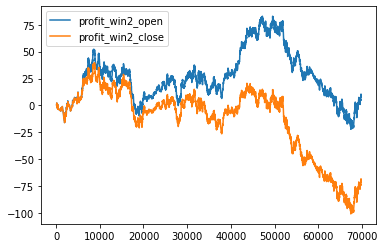

In [12]:
utils.print_away_win_result(segmented_df)

In [13]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.099255
expected_difference_loc,0.082747
simple_expected_difference,0.059199
simple_expected_difference_loc,0.042330
expected_total_loc,-0.019312
simple_expected_total_value,0.013740
simple_expected_total_value_loc,-0.006296
expected_total,-0.001441


In [14]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.283983,-0.500470,0.216487
expected_difference,-0.253157,-0.462891,0.209734
simple_expected_difference,-0.262436,-0.378378,0.115942
simple_expected_difference_loc,-0.056134,-0.169077,0.112942
expected_total_loc,2.193004,2.271890,0.078886
expected_total,2.184529,2.258908,0.074379
simple_expected_total_value,4.563078,4.634696,0.071618
simple_expected_total_value_loc,4.509960,4.560529,0.050569


In [15]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.46) & (segmented_df['expected_difference'] <= -0.49)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference,-0.771651,-0.833952,0.062300
expected_difference_loc,-0.969088,-0.993569,0.024481


Count: 261
Open profit: 25.360000000000003
Close profit: 10.459999999999997
Open ROI: 0.09716475095785441
Close ROI: 0.04007662835249041
UDI: 0.06110514894502354
AxesSubplot(0.125,0.125;0.775x0.755)


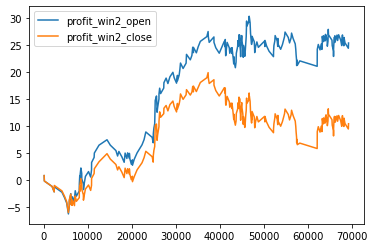

In [16]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference'] <= -0.83) & (segmented_df['expected_difference_loc'] <= -0.99)
]
utils.print_away_win_result(filtered_result_df)